# Percepção Visual

Estudos científicos mostram que cerca de 70% da informação captada por um humano ocorre por meio da visão e os outros 30% dividem-se entre os demais receptores sensoriais (audição, olfato, paladar e tato). Adquirir algum conhecimento sobre a mecânica da visão é útil para que saibamos construir melhor nossas representações visuais e desenvolver projetos visuais melhores. Não é por acaso que termos como _insight_, _iluminação_ e _esclarecimento_, todos relacionados à visão, são utilizados para dar sentido de recebimento de informação e trazer descrições apuradas sobre algo. Por esta razão, percepção visual e visualização de dados são assuntos vinculados. 

## A mecânica da visão

A mecânica da visão pode ser dividida em dois estágios principais:

1. _Sensação_ (processo físico): ocorre quando nossos olhos são estimulados por um objeto emissor ou refletor de luz.
2. _Percepção_ (processo cognitivo): ocorre com a entrada de luz pelos olhos, a qual é absorvida por células nervosas que a traduzem em sinais neurais (pulsos eletroquímicos) que são transmitidos diretamente ao cérebro, onde aquilo que foi sentido torna-se percebido. 

No centro de nossas retinas encontra-se a _fóvea_, região onde são reconhecidos os diferentes espectros de cor (vermelho, azul ou verde) e onde a acuidade visual é máxima. Entretanto, a fóvea é capaz de focar em apenas uma área limitada durante um intervalo de tempo. Quando nossos olhos fixam-se em um ponto particular e observamos seus detalhes, outros eventos podem passar despercebidos pelo nosso campo de visão. Por esta razão, quando construímos uma representação visual abarrotada de cores e elementos, os olhos do espectador ficam dispersos e sem saber para onde direcionar o foco.

### Tipos de memória

A neurologia hoje reconhece diversos tipos de memória, tais como episódica, semântica, icônica, háptica, entre outras. Quanto à temporalidade, há duas classes importantes: a _memória de curto prazo (MCP)_ e a _memória de longo prazo (MLP)_.  

Toda informação recebida pelos olhos é, primeiramente, roteada pelo nervo óptico para a memória icônica (MI), também chamada de _registro sensorial_. A informação permanece na MI por menos de um segundo antes de passar para a MCP. A MCP é similar à memoria RAM de um computador. Ela é temporária e com capacidade de armazenamento limitada. O cérebro lida com pedaços da informação visual. Parte é armazenada e parte é esquecida. Quando de fato, aprendemos, o que fazemos é transferir a informação da MCP para a MLP. Assim, para que uma informação seja seguramente transferida e aprendida, é preciso treinar o nosso cérebro para "esculpir" a informação em nossa MLP. A MLP é, portanto, uma analogia do disco rígido do computador.

Trabalhar com produtos visuais é, de certa forma, equilibrar estímulos para que o receptor da informação possa capturar a informação e absorvê-la de forma adequada. O lado negativo disso é a "exploração" visual através do _marketing_ coercitivo, que propõe máxima atratividade ao público. A finalidade do projeto visual dará a direção a ser seguida, mas sempre deve-se ter em mente que a audiência deve ter sua cognição minimamente respeitada.

### Percepção não controlada 

O termo _percepção não controlada_ (_pre-attentive perception_) é usado para se referir a propriedades visuais que são detectadas rapidamente (em frações de segundo) antes do processo da percepção propriamente dita. Este tipo de percepção manifesta-se, por exemplo, durante a identificação imediata de elementos visuais ({numref}`fig-wordcloud`). 

In [1]:
# Para geração da nuvem de palavras é necessário instalar o `wordcloud` 
# através do comando `pip install wordcloud`. 
# Para geração de texto randomizado é necessário instalar o `lipsum` 
# através do comando `pip install lipsum`.

import lipsum
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, get_single_color_func

# https://amueller.github.io/word_cloud/auto_examples/colored_by_group.html
class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)


# função para gerar figura da wordcloud
def render_wordcloud(text_file):
    
    with open(text_file,'r') as o:
        text = o.read()
        
    wc = WordCloud(max_words=10,margin=0).generate(text)
    
    # A key para cores de destaque pode ser HEX
    # Use lista de strings para highlight
    highlight = {'red': ['et']} 
    lowlight = 'white'
    
    # recolorir
    grp_color = GroupedColorFunc(highlight, lowlight)
    wc.recolor(color_func=grp_color)
    
    # imagem
    plt.imshow(wc,interpolation='bilinear')
    plt.axis('off')
    plt.savefig('../figs/wordcloud.png')

#render_wordcloud('../data/random-text.txt')

```{figure} ../figs/wordcloud.png
---
name: fig-wordcloud
alt: Nuvem de palavras. 
align: center
width: 500px
---
Nuvem de palavras. Nossos olhos detectam rapidamente a palavra _et_ em vermelho.
```

#### Propriedades não controladas

Segundo Colin Ware {cite:p}`ware2019information`, essas propriedades podem ser postas em quatro categorias: _cor_, _formato_, _movimento_ e _posição espacial_. 

Quanto à cor, há três atributos principais, que definem o espaço primário de cores chamado de _HSL_ ({numref}`Tabela %s <tbl-atributos-cor>`). Discutiremos cores com mais detalhes em um capítulo específico. 

```{table} Atributos não controlados de cor.
:name: tbl-atributos-cor

| Atributo    | Descrição |
|:-------------|:---- |
|Matiz (_Hue_)|Caracteriza o comprimento de onda dominante da cor (também chamado de tonalidade cromática)|
|Saturação (_Saturation_)|Medida de pureza da cor, isto é, a quantidade de luz branca|
|Luminância (_Lightness_)|Grau de brilho de uma imagem, em escala de branco a preto (também chamada de intensidade luminosa)|
```

Quanto ao formato, há pelo menos dez atributos reconhecíveis, dos quais alguns já apresentamos ({numref}`Tabela %s <tbl-atributos-forma>`).

```{table} Atributos não controlados de formato.
:name: tbl-atributos-forma

| Atributo    | Exemplo |
|:-------------|:---- |
|Orientação |Linha destacando-se de outras por ter orientação diferente|
|Comprimento|Gráfico com barras de comprimentos variáveis|
|Largura|Largura de uma linha usada para destaque|
|Tamanho|Tamanho de uma forma geométrica para destacar quantidade (elemento visual)|
|Colinearidade|Linhas paralelas|
|Curvatura|Contornos de formas|
|Agrupamento|Objetos dispostos em grupos (clusters)|
|Marcações|Anotações em objetos por meio de marcações|
|Formato|Triângulo entre quadrados|
|Numerosidade|Número de objetos (cardinalidade) em um grupo|
```

Quanto à posição espacial, podemos detectar três atributos ({numref}`Tabela %s <tbl-atributos-posicao>`).

```{table} Atributos não controlados de posição espacial.
:name: tbl-atributos-posicao

| Atributo    | Descrição |
|:-------------|:---- |
|Posição 2D |Codifica dados quantitativos em representações visuais|
|Profundidade estereoscópica|Permite termos uma noção de profundidade espacial em uma imagem plana (ver [estereoscopia](https://pt.wikipedia.org/wiki/Estereoscopia)).|
|Concavidade/convexidade|Cria efeitos de superfície através de sombreamentos.|
```

Quanto ao movimento, há dois atributos ({numref}`Tabela %s <tbl-atributos-movimento>`): _flickering_ e _motion_. O _flickering_ pode ser abusivamente utilizado em páginas da internet. Quando monitores tremulam, alguns efeitos adversos aos olhos são cansaço, irritação e lacrimação. _Motion_ é a característica básica de deslocamento de objetos em tela.

```{table} Atributos não controlados de movimento.
:name: tbl-atributos-movimento

| Atributo    | Descrição |
|:-------------|:---- |
|_Flickering_ |Objetos "tremidos" em websites com forte apelo visual ou _dashboards_|
|_Motion_|Objetos em movimento.|
```

### Percepção controlada

A percepção controlada é consciente, sequencial, e lenta. Dá-se pela procura de foco. Para acentuar a diferença entre percepções, vejamos a figura abaixo, em contexto similar ao da anterior. Ambas as sequências de dígitos são idênticas. Se fôssemos procurar por todas as aparições do dígito "5" na primeira linha demoraríamos muito mais do que na segunda, na qual as aparições estão destacadas em preto. Ou seja, analisar a primeira linha exigirá de nós um certo controle focal; a segunda linha, não. No primeiro caso, a percepção controlada predomina, ao passo que no segundo predomina a não controlada.

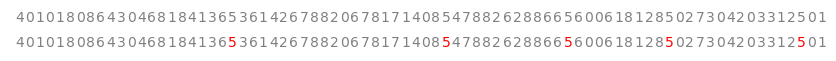

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# gera sequencia aleatória
np.random.seed(10)
text = np.random.randint(0,9,80)

# casting
ss = ''
for si in text:
    ss += str(si)
text = ss; del ss

# figura
fig, ax = plt.subplots(2,1,figsize=(8,0.5),constrained_layout=True)
ax[0].set_xlim(0,1)
ax[0].axis('off'); 
ax[1].axis('off')

# anotação
x = 0.01; dx = 0.02
for si in text:
    ax[0].text(x=x,y=0.5,s=si,fontsize=10,va='center',color='gray')
    if si == '5':
        ax[1].text(x=x,y=0.5,s=si,fontsize=10,va='center',color='r')
    else:
        ax[1].text(x=x,y=0.5,s=si,fontsize=10,va='center',color='gray')
    x += dx

### Cegueira à mudança (_change blindness_)

O fenômeno da "cegueira à mudança" (_change blindness_) ocorre quando, visualmente, somos incapazes de notar mudanças sensíveis no ambiente quando reposicionamos nosso foco instantaneamente de um objeto para outro. Por exemplo, se passarmos um período de tempo observando fixamente uma fotografia e, durante o nosso piscar de olhos, alguém alterá-la de maneira sutil, é bastante provável que não captemos a mudança. Esta incapacidade momentânea de perceber a mudança é similar a uma cegueira temporária. 

Detalhes de duas cenas iguais são, em geral, lembrados apenas quando se olha para áreas específicas. Existem resultados científicos que mostram que um espectador pode olhar várias vezes para uma imagem suficientemente "poluída" e não compreender a totalidade da informação, mesmo depositando nela plena atenção focal. Em outras palavras, a atenção não tem efeitos cumulativos sobre a percepção. Isto significa que projetos visuais devem dar à audiência indicações claras do que se quer destacar. As imagens na {numref}`fig-globe` abaixo retratam o fenômeno da _change blindness_. Nelas existem vários objetos sutis que escapam a uma piscadela de olhos e que não estão presentes, em particular, na imagem à direita, nos mesmos moldes de um "jogo de 7 erros". Deixamos ao leitor a identificação desses objetos, localizáveis apenas por percepção controlada.

```{figure} ../figs/Globe_and_high_court_(Spot_the_difference).jpg
---
name: fig-globe
alt: Imagens retratando o fenômeno da cegueira à mudança.
align: center
width: 650px
---
Imagens retratando o fenômeno da "cegueira à mudança". Atribuição: Globe_and_high_court.jpg, WikiCantona, CC BY-SA 3.0, via Wikimedia Commons.
```

A adequação dos atributos de percepção às representações visuais varia de acordo com a categoria dos dados, como vemos na {numref}`Tabela %s <tbl-atributos-adequacao>`). Os símbolos `-`, `+` e `++`, nesta ordem, significam _adequação insuficiente_, _adequação limitada_, _adequação suficiente_.

```{table} Relação entre adequabilidade de atributos e categoria de dados.
:name: tbl-atributos-adequacao

|Categoria do atributo| Atributo | Quantitativo | Qualitativo categórico | Qualitativo não categórico  | 
|:-------------|:-----------|:-----------|:---------|:-----------|
|Cor|Matiz| - | - | ++ |
|Cor|Luminância| + | ++ | - |
|Forma|Orientação| + | + | - |
|Forma|Comprimento| ++ | + | - |
|Forma|Largura| + | + | - |
|Forma|Tamanho| + | + | - |
|Forma|Colinearidade| - | - | - |
|Forma|Curvatura| + | + | - |
|Forma|Agrupamento| - | - | - |
|Forma|Marcações| - | - | ++ |
|Forma|Formato| - | - | ++ |
|Forma|Numerosidade| ++ | ++ | - |
|Posição|Posição 2D| ++ | ++ | + |
|Posição|Profundidade estereoscópica| - | - | - |
|Posição|Concavidade<br>convexidade| + | + | - |
|Movimento|Flickering| - | - | + |
|Movimento|Motion| + | + | - |
```

## Princípios da Gestalt

_Gestalt_, palavra alemã que, em tradução aproximada, seria algo como "forma total", é a alcunha de uma teoria também conhecida como _psicologia da forma_. Ela explica que, como o ser humano enxerga o "todo" e não as "partes" do todo, aquilo que vemos é compreendido de forma diferente pela mente e, por esta razão, antes precisamos entender a totalidade, para então compreender a particularidade.

A composição de elementos e formas permite que formemos concepções distintas daquilo que vemos e não percebamos particularidades. Vejamos a {numref}`fig-gestalt`. Ao analisar seus elementos, podemos ter diversas percepções. Na primeira linha, o primeiro objeto é um mero quadrado; o segundo é um quadrado "picotado" em quatro; o terceiro é o mesmo quadrado picotado em quatro partes, porém com vãos largos (vemos apenas um "X"?); o último é um quadrado inserido em outro (vemos um  "losango circunscrito"?), porém girado. 

```{figure} ../figs/gestalt.png
---
name: fig-gestalt
alt: Composições de formas e efeitos sobre a percepção (teoria da Gestalt).
align: center
width: 500px
---
Composições de formas e efeitos sobre a percepção (teoria da Gestalt). Preparada por: G. P. Oliveira.
```


Na segunda linha, o que vemos? O primeiro objeto representa um abajur? Uma minka (casa japonesa)? O segundo objeto representa uma casinha com neve no telhado? O terceiro uma casinha com janelas? O último uma fábrica com chaminé? Alguns ou todos esses conceitos podem ter passado pela sua cabeça. Mas será que você percebeu que todos os elementos gráficos são apenas composições de triângulos e quadrados? 

Esse efeito provocado pelas formas, que nos faz ver o todo e não as partes, à primeira vista, é o que a teoria da _Gestalt_ explica. Os princípios da Gestalt são aplicados ao _design_ até hoje para facilitar a comunicação das informações e, muitas vezes, de forma intuitiva.

É possível encontrar os princípios da Gestalt declarados de forma variada hoje em dia. Neste texto, atentaremos para seis:

1. _Figura/Fundo_: o olho humano é capaz de distinguir entre o objeto núcleo e a área que o rodeia.
2. _Continuidade_: o olho humano é compelido a "seguir" o objeto, movendo-se do início dele ao fim.
3. _Proximidade_: quando dois objetos são postos juntos, o olho humano tende a percebê-los como um único grupo.
4. _Similaridade_: quando vários objetos tem aparência similar, o olho humano os percebe como um grupo ou padrão.
5. _Fechamento_: o olho humano tende a perceber um objeto "completo" ou "fechado", mesmo quando é "incompleto" ou não perfeitamento "fechado".
6. _Simetria e ordem_: também chamado de princípio da "boa figura" ou "pregnância" (do alemão _prägnanz_), manifesta-se quando o olho humano percebe formas ambíguas da maneira mais simples possível.

Aplicações desses princípios são exploradas na {numref}`fig-gestalt-principles`, adaptada desta [página](https://www.simplypsychology.org/what-is-gestalt-psychology.html).

```{figure} ../figs/gestalt-principles.png
---
name: fig-gestalt-principles
alt: Princípio da Gestalt.
align: center
width: 650px
---
Princípio fundamentais da Gestal. Preparada por: G. P. Oliveira.
```

## Referências

```{bibliography}
:filter: docname in docnames
```